**Завдання 62_1:**

Напишіть код для визначення границь та кутів у зображенні за допомогою фільтра Собеля.

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

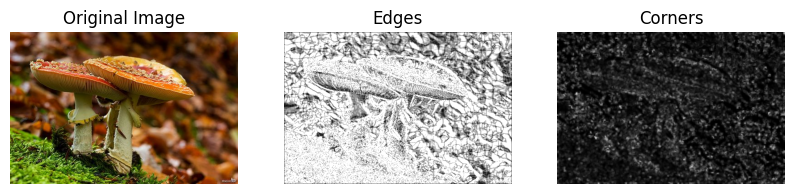

In [14]:

# Завантаження зображення та перетворення у відтінки сірого
img = cv2.imread('Fly_agaric.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Визначення границь у зображенні за допомогою фільтру Собеля
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
abs_sobelx = cv2.convertScaleAbs(sobelx)
abs_sobely = cv2.convertScaleAbs(sobely)
edges = cv2.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)

# Визначення кутів у зображенні на основі виявлених границь
eigenvalues = cv2.cornerMinEigenVal(edges, blockSize=5, ksize=3)

# Відображення зображення та результату за допомогою matplotlib.pyplot
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Edges')
ax[2].imshow(eigenvalues, cmap='gray')
ax[2].set_title('Corners')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()


**Завдання 62_2:**

Використовуючи метод густини градієнта (HOG), напишіть код для витягування ознак з зображення.

In [15]:
from skimage.feature import hog
from skimage import io, color
import matplotlib.pyplot as plt

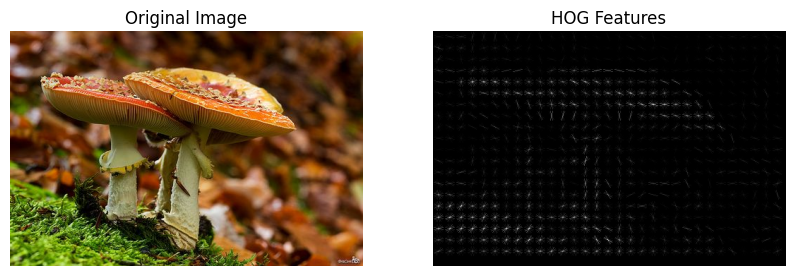

In [18]:
# Витягнення ознак з зображення за допомогою HOG
hog_features, hog_image = hog(gray_2, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True)

# Відображення зображення та результату за допомогою matplotlib.pyplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(hog_image, cmap='gray')
ax[1].set_title('HOG Features')
ax[0].axis('off')
ax[1].axis('off')
plt.show()